In [1]:
import pandas as pd
import xgboost
from sklearn import linear_model, decomposition
from sklearn.pipeline import Pipeline
import numpy
import os
import matplotlib.pyplot as plt
# I call numpy thorugh pandas since pandas contains all of numpy

In [2]:
# Only run this if you're on dave's machine
os.chdir("../../")
scriptpath = "gitcode/bosch/"

In [3]:
# import some testing data

dates = pd.read_csv('train_date.csv', nrows = 5000)
numeric = pd.read_csv('train_numeric.csv', nrows = 5000)
categorical = pd.read_csv('train_categorical.csv', nrows = 5000)
base = pd.read_csv("train_numeric.csv", usecols = ['Id','Response'])

C:\Users\Dave\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (57,59,60,62,63,65,66,68,69,71,72,74,75,77,78,80,81,83,84,86,87,89,90,92,93,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,204,206,210,212,216,218,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,335,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,464,467,470,473,476,479,482,485,488,491,494,497,500,503,506,509,512,515,518,611,614,617,620,623,626,629,632,635,638,641,644,647,650,653,656,659,662,665,668,671,674,677,680,683,686,689,692,695,698,701,704,707,710,713,716,719,722,10

In [7]:
iter_csv = pd.read_csv('train_date.csv',iterator=True,chunksize=10)
for chunk in iter_csv:
    for row in chunk.iterrows():
        print(row)
        break
    break

(0, Id               4.00
L0_S0_D1        82.24
L0_S0_D3        82.24
L0_S0_D5        82.24
L0_S0_D7        82.24
L0_S0_D9        82.24
L0_S0_D11       82.24
L0_S0_D13       82.24
L0_S0_D15       82.24
L0_S0_D17       82.24
L0_S0_D19       82.24
L0_S0_D21       82.24
L0_S0_D23       82.24
L0_S1_D26       82.24
L0_S1_D30       82.24
L0_S2_D34       82.24
L0_S2_D38       82.24
L0_S2_D42       82.24
L0_S2_D46       82.24
L0_S2_D50       82.24
L0_S2_D54       82.24
L0_S2_D58       82.24
L0_S2_D62       82.24
L0_S2_D66       82.24
L0_S3_D70         NaN
L0_S3_D74         NaN
L0_S3_D78         NaN
L0_S3_D82         NaN
L0_S3_D86         NaN
L0_S3_D90         NaN
                ...  
L3_S47_D4175      NaN
L3_S47_D4180      NaN
L3_S47_D4185      NaN
L3_S47_D4190      NaN
L3_S48_D4194      NaN
L3_S48_D4195      NaN
L3_S48_D4197      NaN
L3_S48_D4199      NaN
L3_S48_D4201      NaN
L3_S48_D4203      NaN
L3_S48_D4205      NaN
L3_S49_D4208      NaN
L3_S49_D4213      NaN
L3_S49_D4218      NaN
L3_S49

In [15]:
# Build a dataframe to predict on
features = numeric.drop('Response', axis = 1)
fFeatures = features.fillna(value=9999)
proto = pd.merge(base,features, on='Id')
target = numeric.loc[:,['Id','Response']]

In [11]:
pca = decomposition.PCA()
pipe = Pipeline(steps = [('pca',pca)])

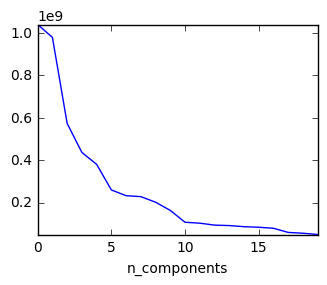

In [25]:
pca.fit(fFeatures)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_[0:20])
plt.axis('tight')
plt.xlabel('n_components')
plt.show()

In [21]:
pca.explained_variance_

array([  1.04045680e+09,   9.79609724e+08,   5.73618310e+08,
         4.36713446e+08,   3.80730275e+08,   2.59841773e+08,
         2.32734248e+08,   2.28198902e+08,   2.02060301e+08,
         1.63223958e+08,   1.07317087e+08,   1.03010759e+08,
         9.39030435e+07,   9.17755607e+07,   8.65259086e+07,
         8.38283730e+07,   7.90784073e+07,   5.94410924e+07,
         5.56270056e+07,   4.96219455e+07,   4.15519007e+07,
         3.13047644e+07,   2.98129188e+07,   2.12568217e+07,
         2.08419405e+07,   1.86768286e+07,   1.86134315e+07,
         1.62823492e+07,   1.50338808e+07,   1.40716964e+07,
         1.27703211e+07,   1.21799379e+07,   1.03909975e+07,
         9.65025919e+06,   9.47424837e+06,   9.10953098e+06,
         8.58415821e+06,   8.15835453e+06,   7.35682274e+06,
         6.91300807e+06,   6.14375876e+06,   5.73331165e+06,
         4.76955997e+06,   4.09978665e+06,   3.11563858e+06,
         2.51981046e+06,   2.42270572e+06,   2.38585917e+06,
         1.60602279e+06,